In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read Dataframe
tmdb_df = pd.read_csv('tmdb_df.csv')

# Convert "release_date" to datetime
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

# Separate the genres to a list
tmdb_df['genres'] = tmdb_df['genres'].str.split(', ')

tmdb_df.shape

(64432, 13)

In [3]:
# Create explode the 'genres' lists
genre_df = tmdb_df.explode('genres')
genre_df.head()

,Unnamed: 0,vote_average,vote_count,release_date,revenue,runtime,budget,imdb_id,popularity,genres,keywords,year,roi
0,1,8.417,32571,2014-11-05,701729206,169,165000000,tt0816692,140.241,Adventure,"rescue, future, spacecraft, race against time,...",2014,4.25
0,1,8.417,32571,2014-11-05,701729206,169,165000000,tt0816692,140.241,Drama,"rescue, future, spacecraft, race against time,...",2014,4.25
0,1,8.417,32571,2014-11-05,701729206,169,165000000,tt0816692,140.241,Science Fiction,"rescue, future, spacecraft, race against time,...",2014,4.25
1,5,7.606,28894,2016-02-09,783100000,108,58000000,tt1431045,72.735,Action,"superhero, anti hero, mercenary, based on comi...",2016,13.50
1,5,7.606,28894,2016-02-09,783100000,108,58000000,tt1431045,72.735,Adventure,"superhero, anti hero, mercenary, based on comi...",2016,13.50


In [4]:
# group data
plot_1_df = genre_df.groupby(['year', 'genres'])['revenue'].sum().unstack(fill_value=0)



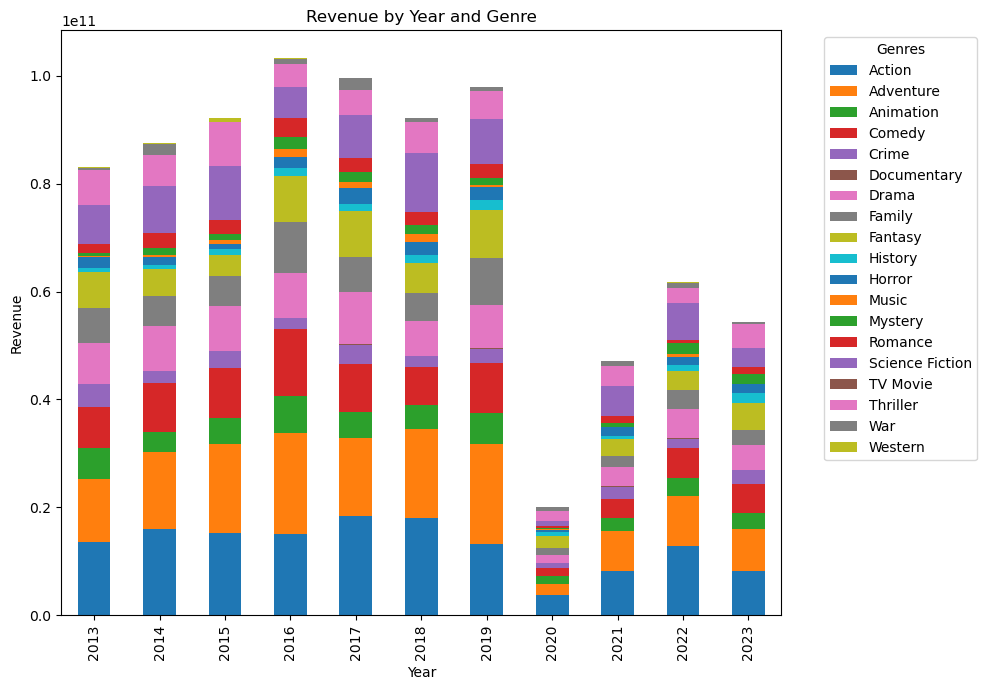

In [6]:
# show the revenue by year and genre

# Plot a stacked bar plot
plot_1_df.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Revenue by Year and Genre')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

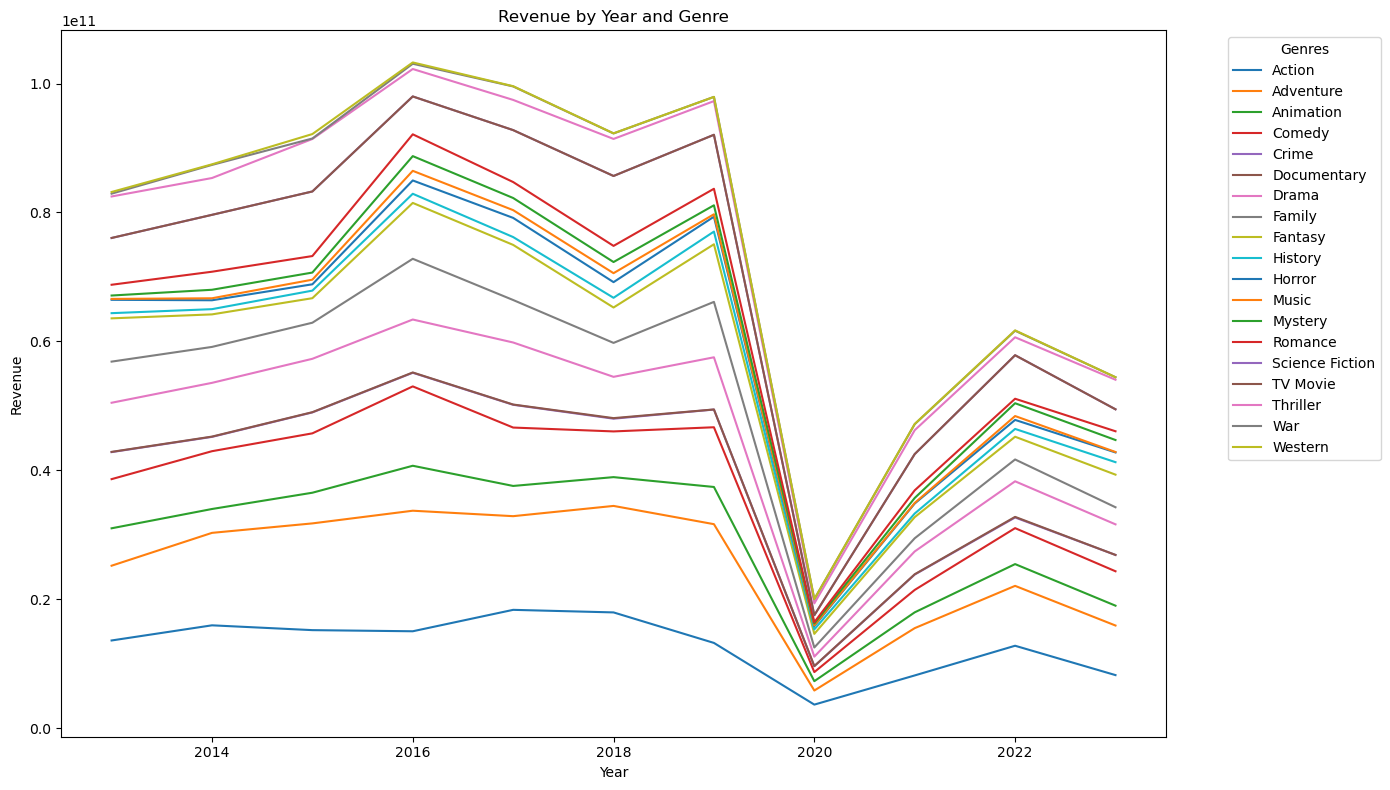

In [7]:
plot_1_df.plot(kind='line', stacked=True, figsize=(14, 8))
plt.title('Revenue by Year and Genre')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns

# Plot the heatmap
sns.heatmap(plot_1_df.T, cmap='viridis', annot=True, fmt='.0f')
plt.figure(figsize=(14, 8))
plt.title('Revenue by Year and Genre')
plt.xlabel('Year')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()